In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re     #REGEX FUNCTION (for text cleaning )
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_fake=pd.read_csv(r"C:\Users\User\OneDrive\True.csv",encoding="ISO-8859-1")
data_true=pd.read_csv(r"C:\Users\User\OneDrive\Fake.csv",encoding="ISO-8859-1")

In [3]:
data_fake.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [4]:
data_fake.shape

(21417, 4)

In [5]:
data_true.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [6]:
data_fake.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [7]:

data_fake['class']=0
data_fake

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [8]:
data_fake.tail()

,title,text,subject,date,class
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [9]:
data_true['class']=1
data_true

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [10]:
data_fake.shape,data_true.shape

((21417, 5), (23481, 5))

In [11]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [12]:
data_merge.shape

(44898, 5)

In [13]:
data_merge.columns


Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
data=data_merge.drop(['title','subject','date'],axis=1)                                                      

In [15]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
data=data.sample(frac=1)

In [17]:
data.head()

,text,class
20128,Tyra for Trump lets it rip on the biased media...,1
16291,MADRID (Reuters) - The upper house of Spain s ...,0
16483,TORONTO (Reuters) - Canada s indigenous popula...,0
1137,For perhaps the first time since Donald Trump ...,1
694,"DANANG, Vietnam (Reuters) - U.S. President Don...",0


In [18]:
data.to_csv('datas')

In [19]:
data.reset_index(inplace=True)
data.head(3)

,index,text,class
0,20128,Tyra for Trump lets it rip on the biased media...,1
1,16291,MADRID (Reuters) - The upper house of Spain s ...,0
2,16483,TORONTO (Reuters) - Canada s indigenous popula...,0


In [20]:
data.drop(['index'],axis=1,inplace=True)

# E D A


In [22]:
data.columns

Index(['text', 'class'], dtype='object')

In [23]:
data.head()

,text,class
0,Tyra for Trump lets it rip on the biased media...,1
1,MADRID (Reuters) - The upper house of Spain s ...,0
2,TORONTO (Reuters) - Canada s indigenous popula...,0
3,For perhaps the first time since Donald Trump ...,1
4,"DANANG, Vietnam (Reuters) - U.S. President Don...",0


In [24]:
data.shape

(44898, 2)

In [49]:
data.describe()

,class
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [51]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


# Preprocessing Text Data

In [56]:
def wordopt(text): #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\User\AppData\Local\Temp\ipykernel_8144\1462576528.py:3: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]','',text)
C:\Users\User\AppData\Local\Temp\ipykernel_8144\1462576528.py:5: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.\S+','',text)
C:\Users\User\AppData\Local\Temp\ipykernel_8144\1462576528.py:9: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*','',text)


In [58]:
data['text']=data['text'].apply(wordopt)

# Data Visualization

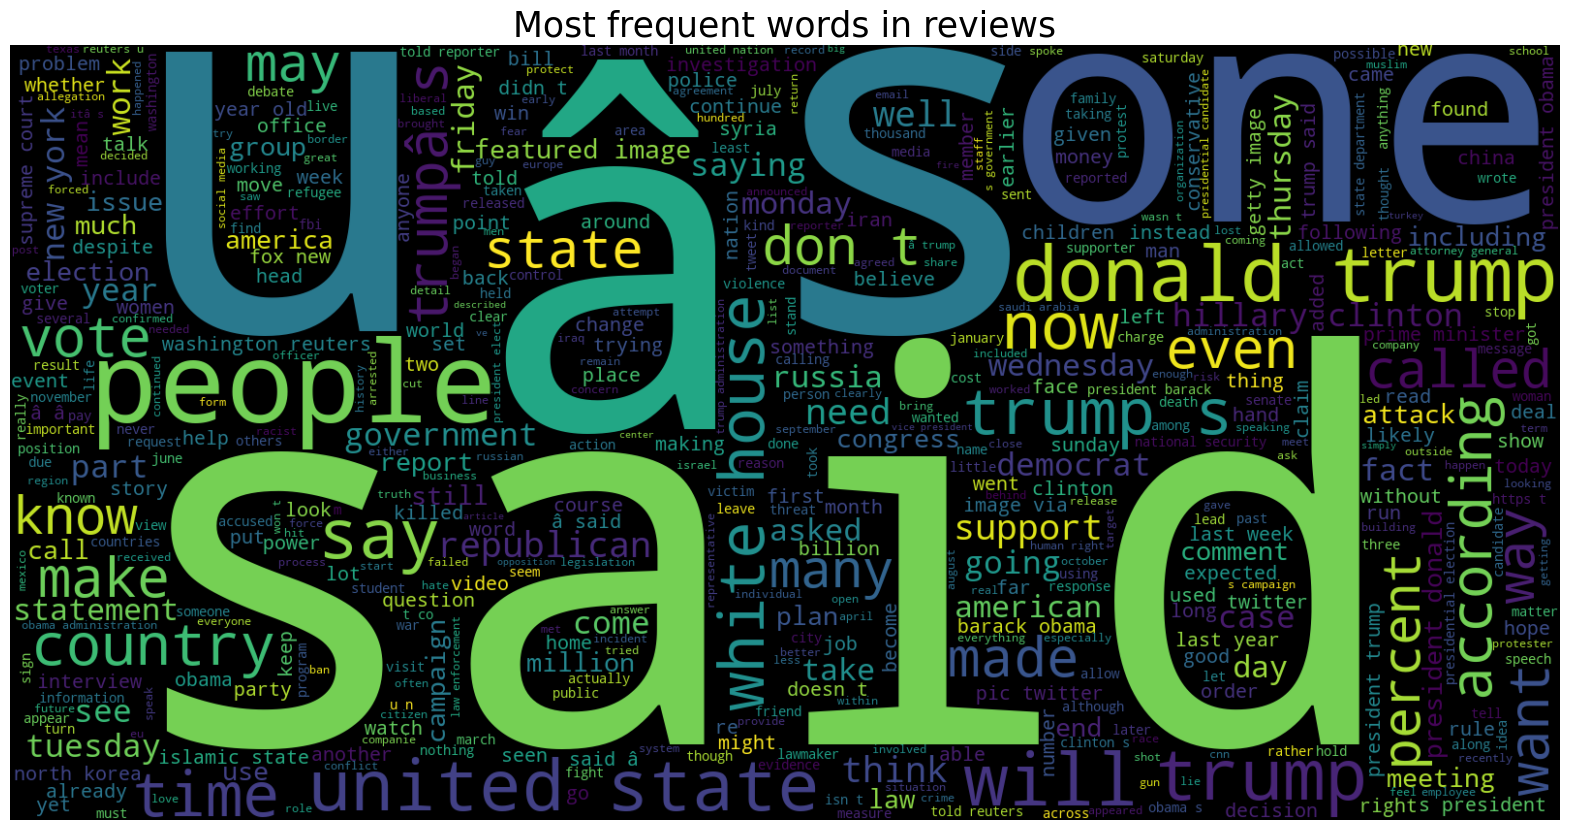

In [61]:
text=' '.join([word for word in data['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in reviews', fontsize=25)
plt.show()

# Data splitting

In [64]:
x=data['text']
y=data['class']

In [66]:
x

0        tyra for trump lets it rip on the biased media...
1        madrid  reuters    the upper house of spain s ...
2        toronto  reuters    canada s indigenous popula...
3        for perhaps the first time since donald trump ...
4        danang  vietnam  reuters    u s  president don...
                               ...                        
44893    newt gingrich was promoting his new book  unde...
44894    nairobi  reuters    kenya s opposition leader ...
44895    so much for tolerance and diversity how would ...
44896    the washington post has been pushing the russi...
44897    caracas  reuters    venezuela  systematically ...
Name: text, Length: 44898, dtype: object

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# NLP

In [89]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [90]:
xv_train

<33673x101498 sparse matrix of type '<class 'numpy.float64'>'
	with 6925497 stored elements in Compressed Sparse Row format>

In [93]:
xv_train.shape

(33673, 101498)

In [95]:
xv_test.shape

(11225, 101498)

# Model Building

In [110]:
Logistic Regression

SyntaxError: invalid syntax (4094908863.py, line 1)

In [ ]:
pred_lr1=LR.predict(xv_test)
pred_lr1

22216    1
27917    1
25007    0
1377     0
32476    1
        ..
15578    1
29394    1
3120     0
25388    0
14337    0
Name: class, Length: 11225, dtype: int64

0.9961692650334075

In [108]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5381
           1       1.00      0.99      1.00      5844

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

